In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import math
plt.style.use('seaborn-poster')
import numpy as np
from datetime import datetime

In [2]:
segments = pd.read_csv("strava-segments.csv")

In [3]:
segments.drop_duplicates(subset=["id"]).shape

(11058, 13)

In [4]:
activities = pd.read_csv("activities-parsed.csv")

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
activities[np.logical_and(activities["Year"] < 2004, activities["Year"])]["Year"].value_counts().sum()

163

In [6]:
segments["climb_category"].value_counts()

1    7310
2    2644
3     914
4     106
5      84
Name: climb_category, dtype: int64

In [7]:
activities.head()

athlete_name  elapsed_time  moving_time  rank  segment  \
0     Tiziano L.         303.0        303.0   1.0  8901694   
1  Fabianelli R.         324.0        324.0   2.0  8901694   
2        Aldo B.         338.0        338.0   3.0  8901694   
3   Francesco V.         341.0        341.0   4.0  8901694   
4      Giulio C.         360.0        360.0   5.0  8901694   

             start_date      start_date_local  Year  Month  avg_grade  \
0  2017-03-03T14:40:08Z  2017-03-03T15:40:08Z  2017      3        7.2   
1  2015-12-20T10:06:44Z  2015-12-20T11:06:44Z  2015     12        7.2   
2  2015-12-20T10:11:17Z  2015-12-20T11:11:17Z  2015     12        7.2   
3  2015-12-13T09:32:11Z  2015-12-13T10:32:11Z  2015     12        7.2   
4  2014-12-11T14:55:10Z  2014-12-11T15:55:10Z  2014     12        7.2   

     ...      climb_category_desc distance  elev_difference        name  \
0    ...                        4   1218.2             99.0  sopra lago   
1    ...                        4   1218.2             99.0  sopra lago   
2    ...                        4   1218.2             99.0  sopra lago   
3    ...                        4   1218.2             99.0  sopra lago   
4    ...                        4   1218.2             99.0  sopra lago   

  resource_state  starred      s_lat      s_lng      e_lat      e_lng  
0              2    False  43.019921  11.213783  43.024506  11.207448  
1              2    False  43.019921  11.213783  43.024506  11.207448  
2              2    False  43.019921  11.213783  43.024506  11.207448  
3              2    False  43.019921  11.213783  43.024506  11.207448  
4              2    False  43.019921  11.213783  43.024506  11.207448  

[5 rows x 21 columns]

In [9]:
activities_filtered = activities[np.logical_and(activities["Year"] >= 2009, activities["Year"] <= 2017)]

In [66]:
activities_2008 = activities[activities["Year"] == 2008]

In [10]:
activities_filtered["distance"].sum() / 1000

12698979.464199996

In [11]:
activities_by_segment_year = activities_filtered.groupby(["Year", "segment"])["rank"].count()

In [12]:
segments_2017 = activities_by_segment_year[2017,]

In [67]:
seg_2008 = activities_2008.groupby(["Year", "segment"])["rank"].count()[2008,]

In [46]:
seg_2008 = seg_2008.index.values

In [13]:
segments_2009 = activities_by_segment_year[2009,]
segments_df_2009 = pd.DataFrame({"count": segments_2009})
segments_df_2009 = pd.merge(segments_df_2009, activities_filtered[["segment", "s_lat", "s_lng", "climb_category"]], left_index=True, right_on="segment")
segments_df_2009 = segments_df_2009.drop_duplicates(subset=["segment"])

In [47]:
seg_2009_old = segments_df_2009[segments_df_2009["segment"].isin(seg_2008)]
seg_2009_new = segments_df_2009[~segments_df_2009["segment"].isin(seg_2008)]

In [14]:
seg_2009 = segments_df_2009["segment"]

In [15]:
min_no_efforts = segments_df_2009["count"].min()

In [16]:
totefforts_2009 = segments_df_2009["count"].sum()

In [17]:
segments_2013 = activities_by_segment_year[2013,]
segments_df_2013 = pd.DataFrame({"count": segments_2013})
segments_df_2013 = pd.merge(segments_df_2013, activities_filtered[["segment", "s_lat", "s_lng", "climb_category"]], left_index=True, right_on="segment")
segments_df_2013 = segments_df_2013.drop_duplicates(subset=["segment"])

In [18]:
seg_2013_old = segments_df_2013[segments_df_2013["segment"].isin(seg_2009)]
seg_2013_new = segments_df_2013[~segments_df_2013["segment"].isin(seg_2009)]

In [19]:
totefforts_2013 = segments_df_2013["count"].sum()
seg_2013 = segments_df_2013["segment"]

In [20]:
segments_2015 = activities_by_segment_year[2015,]
segments_df_2015 = pd.DataFrame({"count": segments_2015})
segments_df_2015 = pd.merge(segments_df_2015, activities_filtered[["segment", "s_lat", "s_lng", "climb_category"]], left_index=True, right_on="segment")
segments_df_2015 = segments_df_2015.drop_duplicates(subset=["segment"])

In [21]:
seg_2015_old = segments_df_2015[segments_df_2015["segment"].isin(seg_2013)]
seg_2015_new = segments_df_2015[~segments_df_2015["segment"].isin(seg_2013)]
seg_2015 = segments_df_2015["segment"]

In [22]:
totefforts_2015 = segments_df_2015["count"].sum()

In [23]:
segments_df_2017 = pd.DataFrame({"count": segments_2017})

In [24]:
segments_df_2017 = pd.merge(segments_df_2017, activities_filtered[["segment", "s_lat", "s_lng", "climb_category"]], left_index=True, right_on="segment")

In [25]:
segments_df_2017 = segments_df_2017.drop_duplicates(subset=["segment"])

In [26]:
totefforts_2017 = segments_df_2017["count"].sum()

In [27]:
max_no_efforts = segments_df_2017["count"].max()

In [28]:
seg_2017_old = segments_df_2017[segments_df_2017["segment"].isin(seg_2015)]
seg_2017_new = segments_df_2017[~segments_df_2017["segment"].isin(seg_2015)]
seg_2017 = segments_df_2017["segment"]

In [29]:
#distance by year
distance_by_year = activities_filtered.groupby(["Year"])["distance"].sum()

In [30]:
# no. of segments
segments_count = activities_filtered.drop_duplicates(subset=["Year", "segment"]).groupby("Year")["segment"].count()

In [31]:
segment_count_array = segments_count.values
segment_year = segments_count.index.values

In [32]:
last_years = distance_by_year.loc[range(2015, 2018)]
last_years_annot = distance_by_year.loc[[2015, 2017]]
early_years = distance_by_year.loc[range(2009, 2016)]
early_years_annot = distance_by_year.loc[[2009]]

In [33]:
segments_years_fitered = segments_count.loc[[2009, 2013, 2017]]
segments_filt_array = segments_years_fitered.values
segments_filt_y = segments_years_fitered.index.values

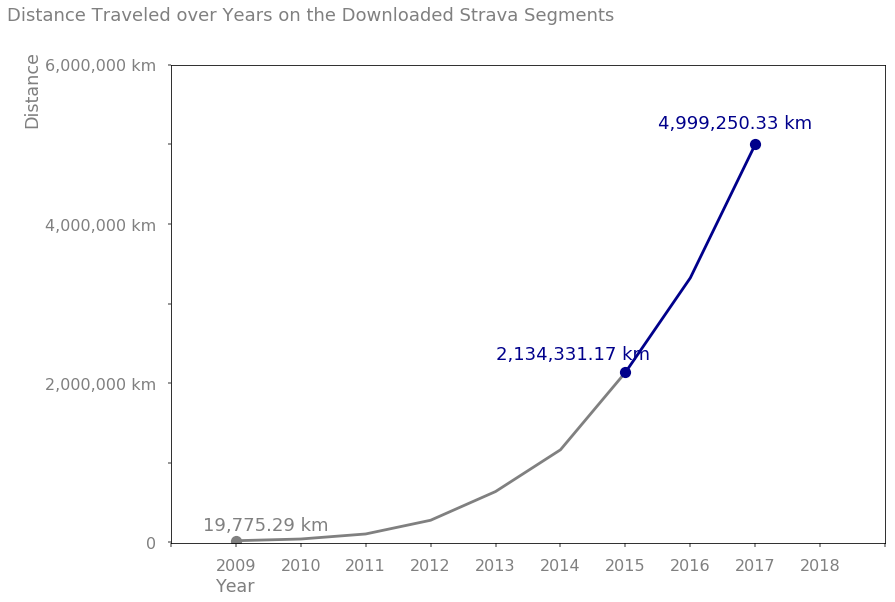

In [34]:
def millions_ticks(x, pos):
    'The two args are the value and tick position'
    if (x == 0):
        return "0"
    if (x % 2000000 == 0):
        return "{:6,.0f} km".format(x)
    return ""
formatter = ticker.FuncFormatter(millions_ticks)

fig = plt.figure()
ax = plt. axes()
ax.plot(early_years.index.values, early_years.values / 1000, "-", color='gray')
ax.plot(last_years.index.values, last_years.values / 1000, "-", color='darkblue')
ax.plot(last_years_annot.index.values, last_years_annot.values / 1000, "o", color='darkblue')
ax.plot(early_years_annot.index.values, early_years_annot.values / 1000, "o", color='gray')
ax.text(2008.5, 150000, "{:2,.2f} km".format(distance_by_year.loc[[2009]].values[0] / 1000), fontsize=18, color="gray")
ax.text(2013, 2300000, "{:6,.2f} km".format(distance_by_year.loc[[2015]].values[0] / 1000), fontsize=18, color="darkblue")
ax.text(2015.5, 5200000, "{:6,.2f} km".format(distance_by_year.loc[[2017]].values[0] / 1000), fontsize=18, color="darkblue")
years_range = np.arange(2008, 2020)
plt.xticks(years_range, ("", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", ""))
ax.yaxis.set_major_formatter(formatter)
plt.ylim(-10000, 6000000)
plt.title("Distance Traveled over Years on the Downloaded Strava Segments ", color="gray", fontsize=18, x=0.2, y=1.08)
ax.set(xlabel="Year", ylabel="Distance")
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.95))
ax.xaxis.label.set_position((0.09, 0))
ax.tick_params(axis='x', colors='gray')
ax.xaxis.label.set_color('gray')
ax.grid(False)

In [ ]:
fig.savefig("km_traveled_on_segments_yearly.png")

In [ ]:
max_no_efforts

In [ ]:
sizes = seg_2013_old["count"].values / 10
sizes.tolist()

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1765985.181048136,4845295.485248807,2291207.7553326664,5225656.30790239&bboxSR=5520&imageSR=5520&size=1500,1086&dpi=96&format=png32&f=image


/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1765985.181048136,4845295.485248807,2291207.7553326664,5225656.30790239&bboxSR=5520&imageSR=5520&size=1500,1086&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1765985.181048136,4845295.485248807,2291207.7553326664,5225656.30790239&bboxSR=5520&imageSR=5520&size=1500,1086&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1765985.181048136,4845295.485248807,2291207.7553326664,5225656.30790239&bboxSR=5520&imageSR=5520&size=1500,1086&dpi=96&format=png32&f=image


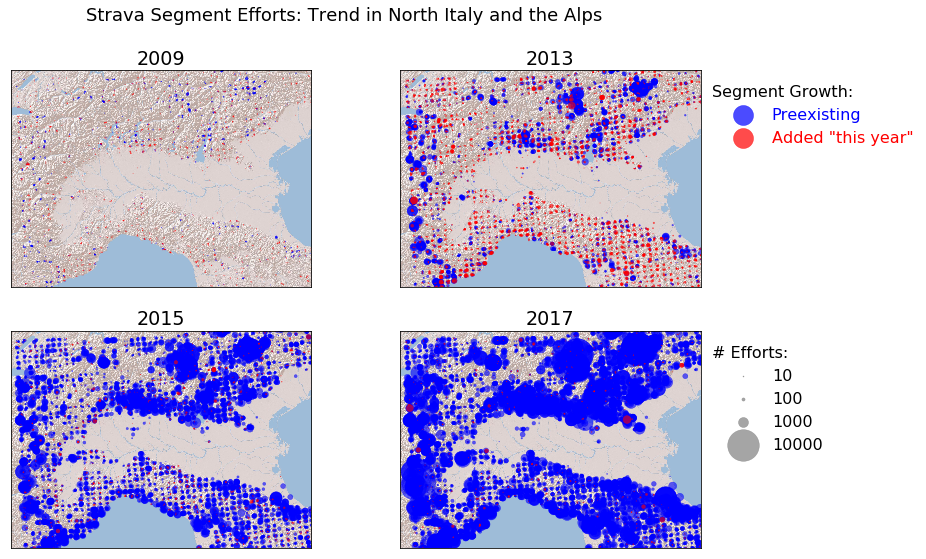

In [65]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_title("2009")
m = Basemap(llcrnrlon=6.3,llcrnrlat=43.7,urcrnrlon=13.35,urcrnrlat=46.7, epsg=5520)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

sizes = seg_2009_old["count"].values / 10
x, y = m(seg_2009_old["s_lng"].values.tolist(), seg_2009_old["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="blue")
sizes = seg_2009_new["count"].values / 10
x, y = m(seg_2009_new["s_lng"].values.tolist(), seg_2009_new["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="red")

ax2 = fig.add_subplot(222)
ax2.set_title("2013")
m = Basemap(llcrnrlon=6.3,llcrnrlat=43.7,urcrnrlon=13.35,urcrnrlat=46.7, epsg=5520)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

sizes = seg_2013_old["count"].values / 10
x, y = m(seg_2013_old["s_lng"].values.tolist(), seg_2013_old["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="blue")
sizes = seg_2013_new["count"].values / 10
x, y = m(seg_2013_new["s_lng"].values.tolist(), seg_2013_new["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="red")

ax2.scatter([], [], c='b', alpha=0.3, s=0, label="Segment Growth:")
ax2.scatter([], [], c='b', alpha=0.7, s=400, label="Preexisting")
ax2.scatter([], [], c='r', alpha=0.7, s=400, label='Added "this year"')
leg = ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=(1.04, 1), fontsize=16)
texts = leg.get_texts()
texts[0].set_color("black")
texts[0].set_x(-60)
texts[1].set_color("blue")
texts[2].set_color("red")


ax3 = fig.add_subplot(223)
ax3.set_title("2015")
m = Basemap(llcrnrlon=6.3,llcrnrlat=43.7,urcrnrlon=13.35,urcrnrlat=46.7, epsg=5520)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

sizes = seg_2015_old["count"].values / 10
x, y = m(seg_2015_old["s_lng"].values.tolist(), seg_2015_old["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="blue")
sizes = seg_2015_new["count"].values / 10
x, y = m(seg_2015_new["s_lng"].values.tolist(), seg_2015_new["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="red")

ax4 = fig.add_subplot(224)
ax4.set_title("2017")
m = Basemap(llcrnrlon=6.3,llcrnrlat=43.7,urcrnrlon=13.35,urcrnrlat=46.7, epsg=5520)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

sizes = seg_2017_old["count"].values / 10
x, y = m(seg_2017_old["s_lng"].values.tolist(), seg_2017_old["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="blue")
sizes = seg_2017_new["count"].values / 10
x, y = m(seg_2017_new["s_lng"].values.tolist(), seg_2017_new["s_lat"].values.tolist())
m.scatter(x, y, s=sizes, alpha=0.6, color="red")

ax4.scatter([], [], c='b', alpha=0.3, s=0, label="# Efforts:")
for l1 in [10, 100, 1000, 10000]:
    ax4.scatter([], [], c='gray', alpha=0.7, s=l1/10, label=str(l1))
leg1 = ax4.legend(loc='upper left', frameon=False, bbox_to_anchor=(1.04, 1), fontsize=16)
texts = leg1.get_texts()
texts[0].set_color("black")
texts[0].set_x(-60)
texts[1].set_color("black")
texts[2].set_color("black")
texts[3].set_color("black")
texts[4].set_color("black")


plt.suptitle("Strava Segment Efforts: Trend in North Italy and the Alps", fontsize=18)
plt.show()

In [68]:
fig.savefig("total-efforts-over-years-geolocalized.png")